# Growth Curve Analysis
## Based on Nicole's script with some alterations from Mariana

We need to transform the growth curves into log scale to use statistic tests (ANOVA) to compare them, using linear regression

#### Importing the packages necessary to run the scrip and make graphs

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import growth_curve_v3 as od
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from matplotlib import lines
lines.lineStyles.keys()
from matplotlib import lines as ls
lines.lineStyles.keys()


#graph aesthetics
sns.set_context('paper', font_scale=2)
sns.set_style('ticks')
sns.color_palette("Set3")#sns.set_palette(['#0365C0','#E31B1C','#70BF41','#F39019','#773F9B','#85888D']) # custom color palette
sns.set_style({'axes.edgecolor': 'black'})
plt.rc('text', usetex=False)

#### Importation of growth curve analysis python script that should be in the same folder as your jupyter notebook

Running the OD function to analyse the data using the slidding window method as default (check Nicole's pdf for details)

This function recieves the directory for either the text file imported from the plate reader or the equivalent in excel. It also recieves the plate layout and you need to give it a directory to save the outcome that contains the calculations of growth rate etc.

In [3]:
layout = pd.read_excel('layout.xlsx')
gc = pd.read_excel('cell.xlsx')

In [4]:
expt = od.analyze_experiment('cell.xlsx', 
                            plate_layout = 'layout.xlsx',
                            blank=0.08,
                            out_dir = '',
                            sample_plots = True, correction = [0.6, 0.2141, 1.7935])

initialized experiment
analyzed samples
created output data table


In [158]:
#alternative for lag_phase and OD 
expt = od.analyze_experiment('rawdata.xlsx', 
                            plate_layout = 'layout.xlsx',
                            method = 'sliding_window',
                            window_size = 9,
                            denoising = 72,
                            out_dir = ',
                            sample_plots = True, correction = [0.6, 0.2141, 1.7935])

data denoised
initialized experiment
analyzed samples
created output data table


Make summary plots for the growth rate and doubling time

/Users/agarona/Documents/Postdoc/experiments_projects/230227-CellSizeEvolution/growthcurves/240117-Gen1500-cell/growth_curve_v3.py:311: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.results[metric].dropna(), kde=False, rug=True)


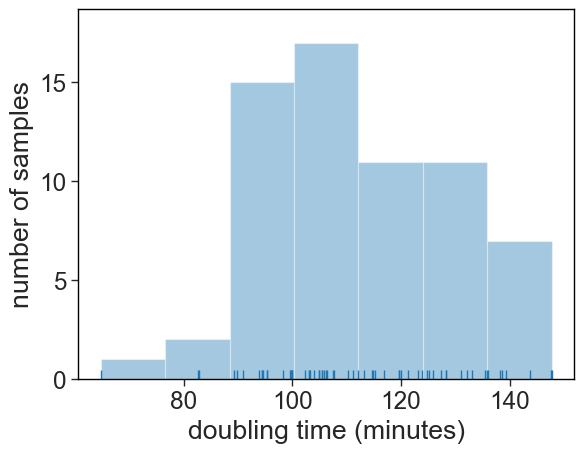

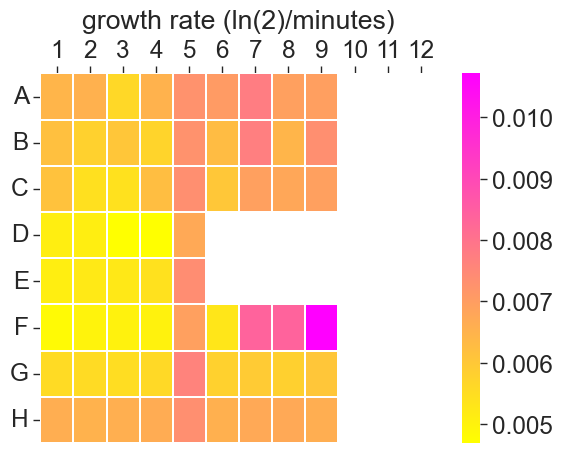

In [6]:
od.make_plots(expt)
output = pd.read_excel('cell_output.xlsx')
#output = pd.read_excel('/Users/agarona/Documents/Postdoc/experiments_projects/230227-CellSizeEvolution/growthcurves/240117-Gen1500/Sliding/rawdata_output.xlsx')

#before gc_test

Set up the conditions of your experiment as vectors (?). They need to be in accordance to your plate layout. In this example I have two strains and 6 different media conditions

In [ ]:
#layout.drop(index = 1, inplace=True) #to drop replicas
#pd.set_option('display.max_rows', None) #shows all the rowns in the dataframe, where we can confirm it was deleted

In [ ]:
layout.head()

,well,strain,replicate,generation,inoculum,strain_inoculum
0,A1,B1,1,1500,20,B1-20
1,A2,B1,2,1500,20,B1-20
2,A3,B1,3,1500,20,B1-20
3,A4,B1,4,0,20,B1-20
4,A5,1176,1,1500,cell,1176-cell


In [ ]:
output.head()

,Unnamed: 0,well,growth rate,r-squared,doubling time,time of max growth rate,start of fit region,end of fit region,lag time,OD at end of lag,...,OD at saturation,max OD,time of max OD,row,column,strain,replicate,generation,inoculum,strain_inoculum
0,1,A1,0.010015,0.997112,69.213322,70,0,12,NaN,NaN,...,1.362,1.470,1140,1,1,B1,1,1500,20,B1-20
1,2,A2,0.010125,0.996154,68.457541,70,0,12,NaN,NaN,...,1.322,1.442,1280,1,2,B1,2,1500,20,B1-20
2,3,A3,0.008395,0.995133,82.563715,70,0,12,NaN,NaN,...,1.321,1.444,1250,1,3,B1,3,1500,20,B1-20
3,4,A4,0.010330,0.995899,67.103005,60,0,11,NaN,NaN,...,1.342,1.455,1280,1,4,B1,4,0,20,B1-20
4,5,A5,0.008426,0.997209,82.259783,140,6,20,37.654385,0.164,...,1.385,1.522,1300,1,5,1176,1,1500,cell,1176-cell


In [8]:
strlist = pd.read_excel('layout.xlsx',sheet_name='Sheet1', usecols="B,C,D,E")

strain_list=strlist['strain'].unique()
print(strain_list)
generation_list=strlist['generation'].unique()
print(generation_list)
inoculum_list=strlist['inoculum'].unique()
print(inoculum_list)

['B1' '1176' 'B2' 'B3' 'S1' 'S2' 'S3' 'Ancestor' 'WT']
[1500    0    1]
[20 'cell']


Change index to timepoints for growthcurve plotting

In [9]:
output.shape

(64, 21)

In [10]:
times = np.arange(10, 1310, 10) #only works if delete the time until 1300 min
expt.data.insert(0, "time", times, True)
hours = pd.to_datetime(expt.data.time, unit='m').dt.strftime('%H:%M')
expt.data.insert(0, "Time", hours, True)
expt.data.drop("time",axis=1)
expt.data.set_index("Time",drop=True, inplace = True)
expt.data.drop("time", inplace=True, axis=1)
expt.data.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,B1,...,G9,H1,H2,H3,H4,H5,H6,H7,H8,H9
Time,,,,,,,,,,,,,,,,,,,,,
00:10,18846000.0,18846000.0,20783000.0,19442000.0,24646000.0,19740000.0,19740000.0,18846000.0,19740000.0,19442000.0,...,29809000.0,23662000.0,24400000.0,25138000,22924000.0,23416000.0,27751000.0,25350000.0,27751000.0,29123000.0
00:20,19591000.0,19591000.0,21379000.0,20187000.0,25876000.0,21081000.0,21081000.0,20187000.0,21379000.0,20038000.0,...,31181000.0,24892000.0,25138000.0,26368000,23662000.0,25138000.0,29466000.0,27065000.0,28780000.0,31181000.0
